In [2]:
%%capture

!pip install gdown gpxpy contextily

In [3]:
%%capture

import gdown

FOLDER_URL = 'https://drive.google.com/drive/folders/1SOqJ2zJtu4qYgT0_UeQrOgFWGHxMeDe_'
gdown.download_folder(FOLDER_URL, quiet=True, use_cookies=False)

In [22]:
import pandas as pd

constellation_names = {
    0: 'Unknown',
    1: 'GPS',
    3: 'Glonass',
    4: 'QZSS',
    5: 'Beidou',
    6: 'Galileo',
}

gnss_logger_df = pd.read_csv('/content/polar-vs-gnss-logger/status_gnss_log_2024_11_28_04_57_56.txt')

gnss_logger_df['Time'] = pd.to_datetime(gnss_logger_df['UnixTimeMillis'], unit='ms', utc=True)
gnss_logger_df['ConstellationName'] = gnss_logger_df['ConstellationType'].map(constellation_names).astype(str)

gnss_logger_df.head()

,Status,UnixTimeMillis,SignalCount,SignalIndex,ConstellationType,Svid,CarrierFrequencyHz,Cn0DbHz,AzimuthDegrees,ElevationDegrees,UsedInFix,HasAlmanacData,HasEphemerisData,BasebandCn0DbHz,Time,ConstellationName
0,Status,NaN,1,0,3,8,1605374980,39.83,300.0,49.0,0,1,1,35.834710,NaT,Glonass
1,Status,NaN,1,0,3,8,1605374980,39.83,300.0,49.0,0,1,1,35.834710,NaT,Glonass
2,Status,NaN,1,0,3,8,1605374980,39.71,300.0,49.0,0,1,1,35.711636,NaT,Glonass
3,Status,NaN,1,0,3,8,1605374980,39.71,300.0,49.0,0,1,1,35.711636,NaT,Glonass
4,Status,NaN,2,0,3,8,1605374980,39.68,300.0,49.0,0,1,1,35.681644,NaT,Glonass


In [5]:
gnss_logger_df.columns

Index(['Status', 'UnixTimeMillis', 'SignalCount', 'SignalIndex',
       'ConstellationType', 'Svid', 'CarrierFrequencyHz', 'Cn0DbHz',
       'AzimuthDegrees', 'ElevationDegrees', 'UsedInFix', 'HasAlmanacData',
       'HasEphemerisData', 'BasebandCn0DbHz', 'Time', 'ConstellationName'],
      dtype='object')

In [6]:
import gpxpy
import pandas as pd

def parse_gpx(filepath):
  gpx_file = open(filepath, 'r')
  gpx = gpxpy.parse(gpx_file)

  data = []

  for track in gpx.tracks:
    for segment in track.segments:
      for point in segment.points:
        time, lat, lng = point.time, point.latitude, point.longitude,
        data.append({
          'time': time,
          'lat': lat,
          'lon': lng,
        })

  df = pd.DataFrame(data)
  df['time'] = pd.to_datetime(df['time'])

  return df

polar_df = parse_gpx('/content/polar-vs-gnss-logger/Evgeny_Arbatov_2024-11-28_04-59-24.GPX')
polar_df.head()

,time,lat,lon
0,2024-11-27 21:59:24.498000+00:00,20.992938,105.868227
1,2024-11-27 21:59:25.499000+00:00,20.992938,105.868227
2,2024-11-27 21:59:26.500000+00:00,20.993048,105.868228
3,2024-11-27 21:59:27.500000+00:00,20.993125,105.868147
4,2024-11-27 21:59:28.500000+00:00,20.993082,105.868172


In [7]:
osmtracker_df = parse_gpx('/content/polar-vs-gnss-logger/osm-upload1772647869123905882.gpx')
osmtracker_df.head()

,time,lat,lon
0,2024-11-27 21:58:02+00:00,20.993746,105.869495
1,2024-11-27 21:58:03+00:00,20.993766,105.869473
2,2024-11-27 21:58:04+00:00,20.993704,105.869466
3,2024-11-27 21:58:05+00:00,20.993648,105.869437
4,2024-11-27 21:58:06+00:00,20.993630,105.869429


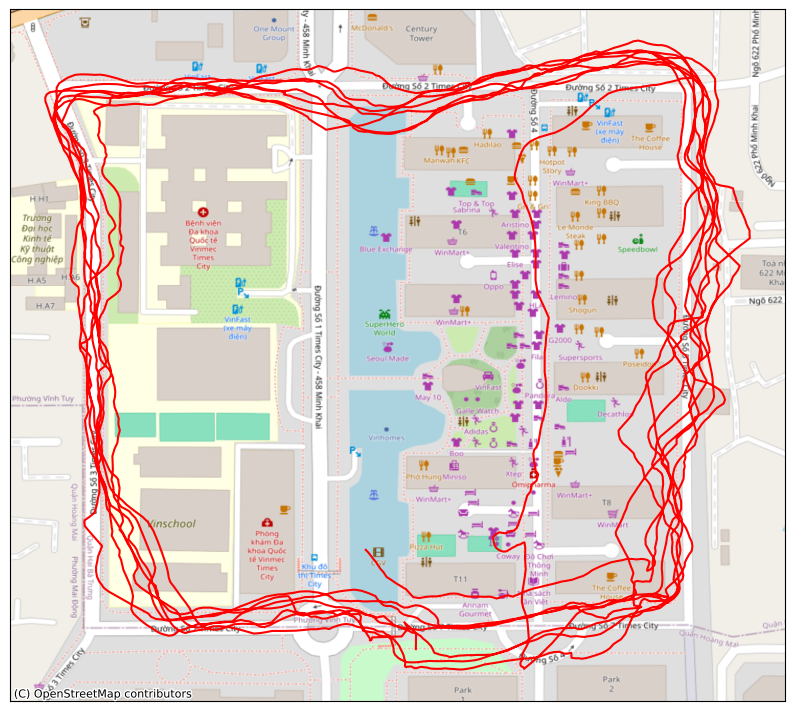

In [8]:
import matplotlib.pyplot as plt
import contextily as ctx

def plot_gpx(df):
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.plot(df['lon'], df['lat'], 'r-', label="Route")
  ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
  ax.set_aspect('equal', adjustable='box')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
  plt.show()

plot_gpx(polar_df)

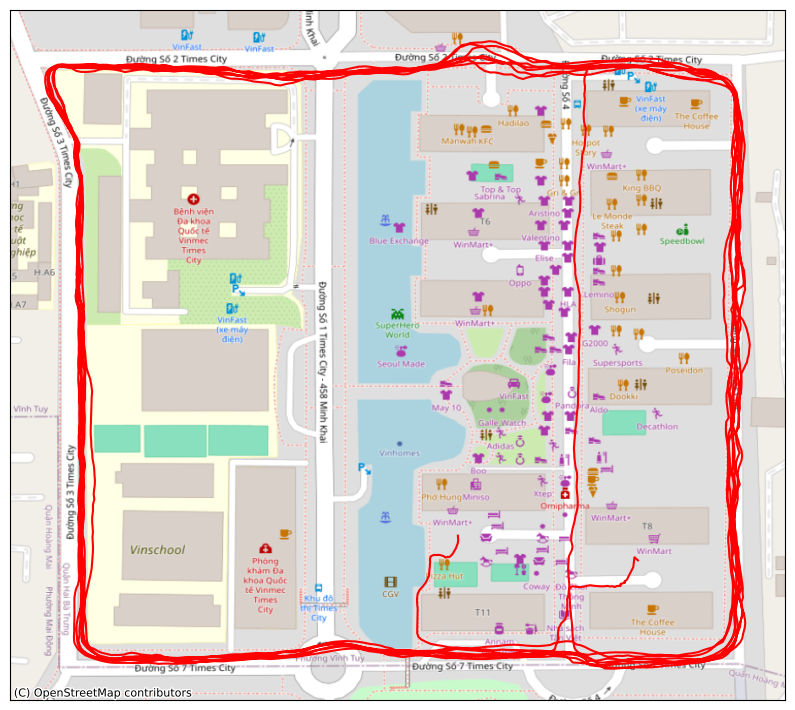

In [9]:
plot_gpx(osmtracker_df)

In [10]:
polar_start_time = polar_df.iloc[0]['time']
polar_start_time

Timestamp('2024-11-27 21:59:24.498000+0000', tz='SimpleTZ('Z')')

In [11]:
gnss_logger_polar_fix_time = gnss_logger_df[gnss_logger_df['Time'] >= polar_start_time].iloc[0]['Time']
gnss_logger_polar_fix_time

Timestamp('2024-11-27 21:59:25+0000', tz='UTC')

In [12]:
polar_fix_df = gnss_logger_df[gnss_logger_df['Time'] == gnss_logger_polar_fix_time]
polar_fix_df.head()

,Status,UnixTimeMillis,SignalCount,SignalIndex,ConstellationType,Svid,CarrierFrequencyHz,Cn0DbHz,AzimuthDegrees,ElevationDegrees,UsedInFix,HasAlmanacData,HasEphemerisData,BasebandCn0DbHz,Time,ConstellationName
6050,Status,1.732745e+12,38,0,5,34,1561097980,35.12,229.0,71.0,1,1,1,31.116428,2024-11-27 21:59:25+00:00,Beidou
6051,Status,1.732745e+12,38,1,6,19,1575420030,27.46,20.0,64.0,0,1,1,23.463440,2024-11-27 21:59:25+00:00,Galileo
6052,Status,1.732745e+12,38,2,1,15,1575420030,32.20,7.0,61.0,1,1,1,28.197208,2024-11-27 21:59:25+00:00,GPS
6053,Status,1.732745e+12,38,3,4,199,1575420030,31.12,133.0,56.0,1,1,1,27.115408,2024-11-27 21:59:25+00:00,QZSS
6054,Status,1.732745e+12,38,4,4,195,1575420030,34.61,124.0,55.0,1,1,1,30.614230,2024-11-27 21:59:25+00:00,QZSS


In [13]:
polar_fix_df.groupby('ConstellationName')['Svid'].nunique().reset_index()

,ConstellationName,Svid
0,Beidou,17
1,GPS,8
2,Galileo,4
3,Glonass,5
4,QZSS,4


In [14]:
before_polar_fix_df = gnss_logger_df[gnss_logger_df['Time'] < gnss_logger_polar_fix_time]
before_polar_fix_df.groupby('ConstellationName')['Svid'].nunique().reset_index()

,ConstellationName,Svid
0,Beidou,18
1,GPS,9
2,Galileo,6
3,Glonass,6
4,QZSS,4


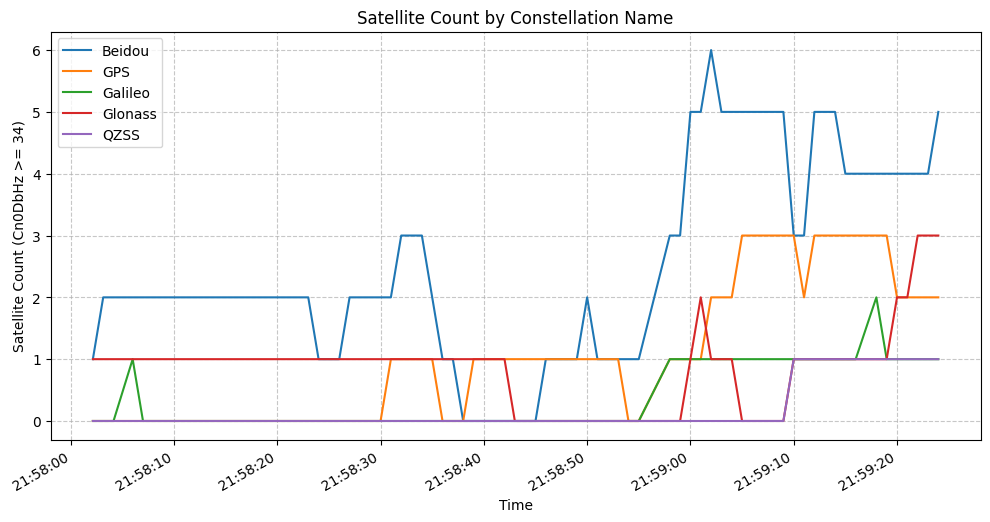

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

grouped = before_polar_fix_df[before_polar_fix_df['Cn0DbHz'] >= 34].groupby(['Time', 'ConstellationName'])['Svid'].nunique().reset_index()
grouped.columns = ['Time', 'ConstellationName', 'SvidUnqiueCount']

pivoted = grouped.pivot(index='Time', columns='ConstellationName', values='SvidUnqiueCount').fillna(0)

ax = pivoted.plot(figsize=(12, 6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('Satellite Count (Cn0DbHz >= 34)')
ax.set_title('Satellite Count by Constellation Name')
plt.legend()
plt.show()

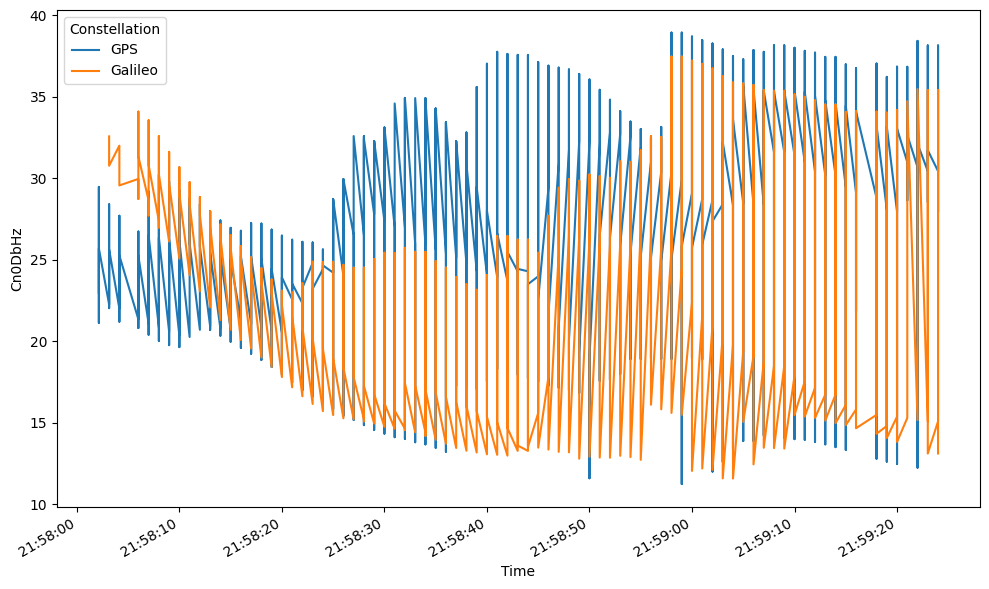

In [16]:
import matplotlib.pyplot as plt

gps_galileo_before_fix_df = before_polar_fix_df[before_polar_fix_df['ConstellationName'].isin(['GPS', 'Galileo'])]

gps_galileo_before_fix_df = gps_galileo_before_fix_df.set_index('Time')
grouped_gps_galileo_before_fix_df = gps_galileo_before_fix_df.groupby('ConstellationName')

fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped_gps_galileo_before_fix_df:
    group.plot(y='Cn0DbHz', ax=ax, label=name)

ax.set_xlabel('Time')
ax.set_ylabel('Cn0DbHz')
ax.legend(title='Constellation')
plt.tight_layout()
plt.show()

In [17]:
before_polar_fix_df[before_polar_fix_df['Cn0DbHz'] >= 35].groupby('ConstellationName')['Svid'].nunique().reset_index()

,ConstellationName,Svid
0,Beidou,7
1,GPS,5
2,Galileo,2
3,Glonass,4
4,QZSS,1


In [18]:
gnss_logger_df[gnss_logger_df['UsedInFix'] == 1].groupby('ConstellationName')['Svid'].nunique().reset_index()

,ConstellationName,Svid
0,Beidou,18
1,GPS,10
2,Galileo,6
3,Glonass,9
4,QZSS,4


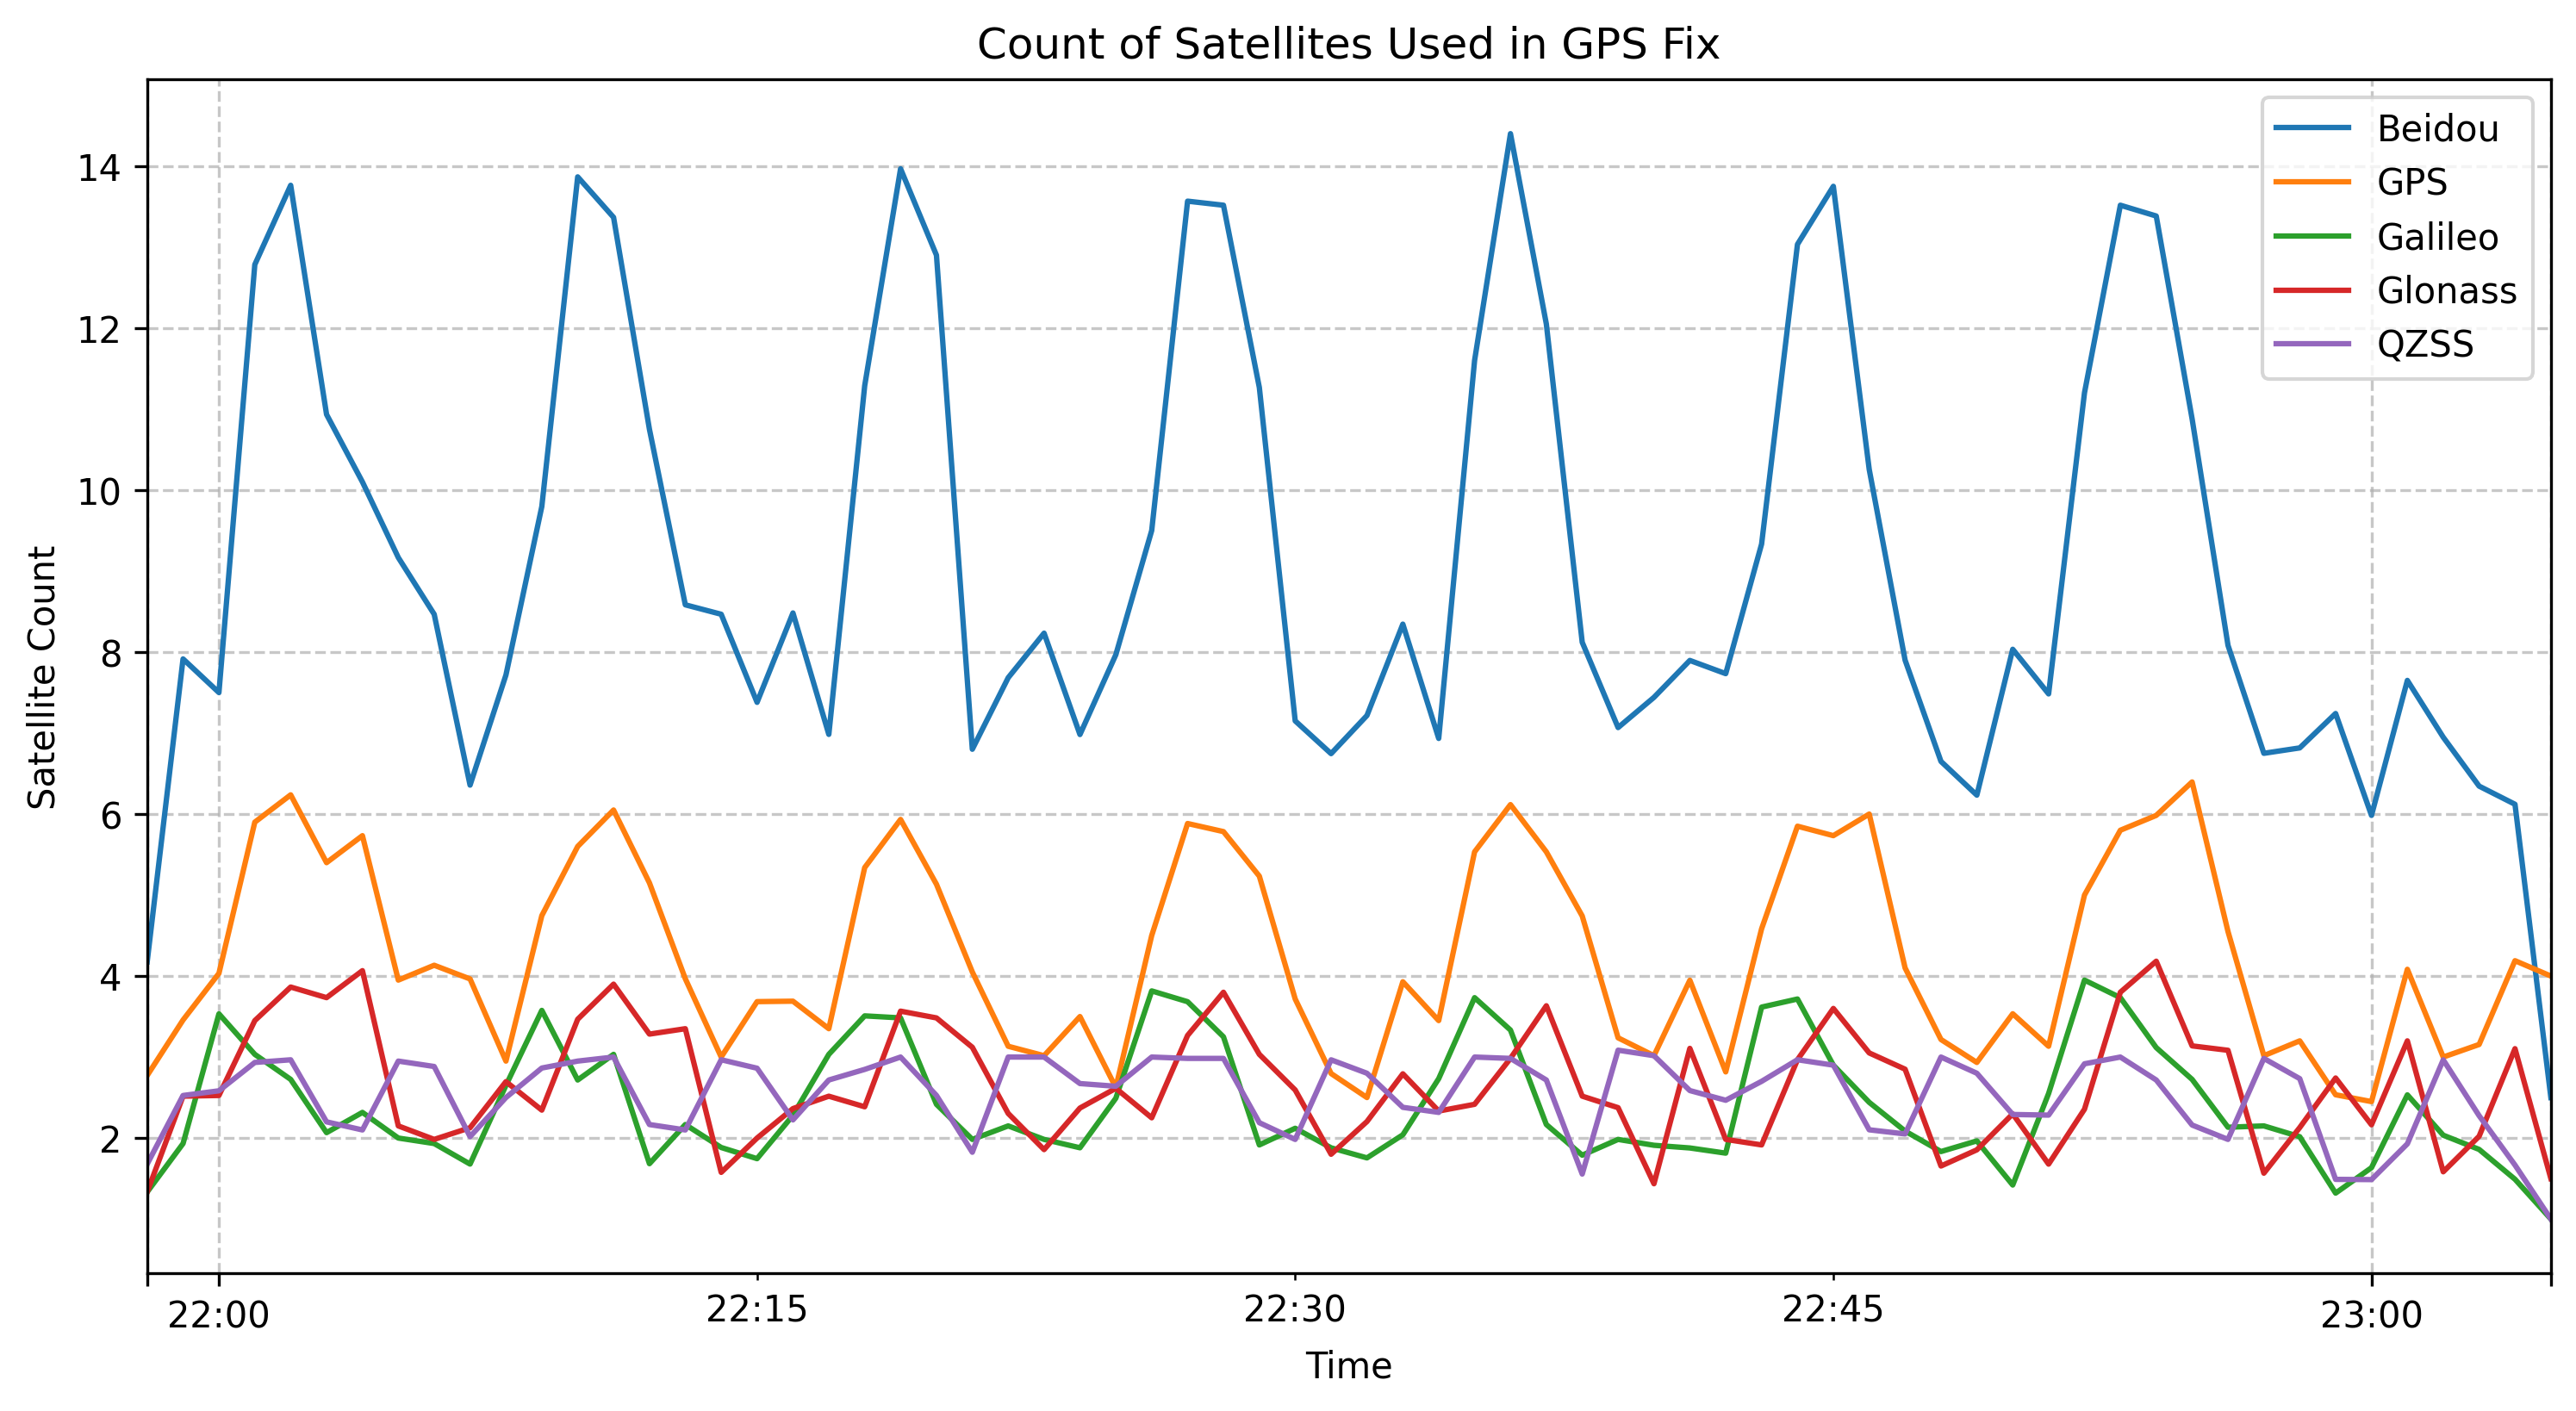

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

grouped = gnss_logger_df[gnss_logger_df['UsedInFix'] == 1].groupby(['Time', 'ConstellationName'])['Svid'].nunique().reset_index()
grouped.columns = ['Time', 'ConstellationName', 'SvidUniqueCount']

pivoted = grouped.set_index('Time').groupby('ConstellationName')['SvidUniqueCount'].resample('1Min').mean().unstack(level=0).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
pivoted.plot(ax=ax)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('Satellite Count')
ax.set_title('Count of Satellites Used in GPS Fix')
plt.legend()
plt.show()